In [1]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

pio.renderers.default = 'iframe'

pio.templates['ck_template'] = go.layout.Template(
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font=dict(family='Calibri Light'),
    layout_title_font = dict(family='Calibri'),
    layout_hoverlabel_font = dict(family='Calibri Light')
)

pio.templates.default = 'ck_template+gridon'

In [2]:
#import necessary packages
import numpy as np
import pandas as pd

train_in_file = 'C:/Users/24307/Downloads/Kaggle/train.csv'
test_in_file = 'C:/Users/24307/Downloads/Kaggle/test.csv'
data = pd.read_csv(train_in_file)
test = pd.read_csv(test_in_file)

In [3]:
data.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,2754_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Asch Stradick,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [4]:
# looks like age<17 are unlikely to be VIPs, but that yields to nothing valuable as we classify most of nans in VIP as False
import plotly.express as px
df = data.loc[(data.Age.isnull() == False)&(data.VIP.isnull() == False)]
fig = px.histogram(df, x='Age', color='VIP')
fig.show()

In [5]:
# children <= 12 years old are barred from consumption
import plotly.express as px
data['TotalSpended'] = data['RoomService'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa'] + data['VRDeck']
test['TotalSpended'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']
df = data.loc[(data.Age.isnull() == False)&(data.TotalSpended.isnull() == False)]
fig = px.histogram(df, x='Age', color='TotalSpended')
fig.show()

In [6]:
# The accumulative values suits bell curve. Why not propagating the nans with neighboring values?
import plotly.express as px
import plotly.graph_objects as go

df = data.groupby('Age').sum('TotalSpended').reset_index()

x0 = df.RoomService
x1 = df.FoodCourt
x2 = df.ShoppingMall
x3 = df.Spa
x4 = df.VRDeck
x5 = df.TotalSpended

fig = go.Figure()
fig.add_trace(go.Line(y=x0, name='RoomService'))
fig.add_trace(go.Line(y=x1, name='FoodCourt'))
fig.add_trace(go.Line(y=x2, name='ShoppingMall'))
fig.add_trace(go.Line(y=x3, name='Spa'))
fig.add_trace(go.Line(y=x4, name='VRDeck'))
fig.add_trace(go.Line(y=x5, name='TotalSpended'))

fig.show()

In [7]:
df2 = data.loc[(data.Age.isnull() == False)&(data.TotalSpended.isnull() == True)]
df2.fillna(method='bfill', inplace=True)
df2 = df2.iloc[:-1, :]
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True,NaN
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Altardr Flatic,True,NaN
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,0.0,0.0,0.0,Flats Eccle,False,NaN
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,0.0,0.0,0.0,Mollen Mcfaddennon,False,NaN
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,0.0,0.0,0.0,0.0,0.0,Mael Brantuarez,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,9220_03,Earth,False,F/1886/P,PSO J318.5-22,22.0,False,623.0,0.0,0.0,0.0,53.0,Kennie Barrilloney,True,NaN
8642,9221_01,Earth,True,G/1497/P,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,0.0,Elicey Beachez,False,NaN
8643,9222_01,Mars,True,F/1784/S,TRAPPIST-1e,50.0,False,0.0,0.0,0.0,0.0,0.0,Carves Chate,True,NaN
8665,9247_01,Earth,True,G/1491/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,188.0,Phia Cleang,False,NaN


In [8]:
# check sample results
df2 = df2.groupby('Age').sum('TotalSpended').reset_index()

x0 = df2.RoomService
x1 = df2.FoodCourt
x2 = df2.ShoppingMall
x3 = df2.Spa
x4 = df2.VRDeck

fig = go.Figure()
fig.add_trace(go.Line(y=x0, name='RoomService'))
fig.add_trace(go.Line(y=x1, name='FoodCourt'))
fig.add_trace(go.Line(y=x2, name='ShoppingMall'))
fig.add_trace(go.Line(y=x3, name='Spa'))
fig.add_trace(go.Line(y=x4, name='VRDeck'))

fig.show()

In [9]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [10]:
data[['id', 'num']] = data.PassengerId.str.split('_', -1, expand=True)
explore = data.PassengerId.str.split('_', -1, expand=True)
data_prep = pd.DataFrame()
data_prep[['id','cum']] = explore.groupby(0).count().reset_index()
data = pd.merge(data, data_prep, how='inner', on='id')
data['Status'] = 'empty'
data.loc[data.cum == 1, 'Status'] = 1
data.loc[data.cum != 1, 'Status'] = 0
# data.loc[data.cum == 2, 'Status'] = 'couple'
# data.loc[data.cum == 3, 'Status'] = 'family'
# data.loc[data.cum > 3, 'Status'] = 'tourist group'

test[['id', 'num']] = test.PassengerId.str.split('_', -1, expand=True)
test_explore = test.PassengerId.str.split('_', -1, expand=True)
test_prep = pd.DataFrame()
test_prep[['id','cum']] = test_explore.groupby(0).count().reset_index()
test = pd.merge(test, test_prep, how='inner', on='id')
test['Status'] = 'empty'
test.loc[test.cum == 1, 'Status'] = 1
test.loc[test.cum != 1, 'Status'] = 0
# test.loc[test.cum == 2, 'Status'] = 'couple'
# test.loc[test.cum == 3, 'Status'] = 'family'
# test.loc[test.cum > 3, 'Status'] = 'tourist group'

In [11]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0001,01,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,0002,01,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,0003,01,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,0003,02,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0004,01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,9276,01,1,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,9278,01,1,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,9279,01,1,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,9280,01,2,0


In [12]:
#check data shape
data.shape

(8693, 19)

In [13]:
#fill missing CryoSleep data with True for those not spending any money
#fill missing spenditure data of kids less than 12 with zero spending
data.loc[(data['CryoSleep'].isnull()) 
         & (data['TotalSpended'] <= 0), 'CryoSleep'] = True
test.loc[(test['CryoSleep'].isnull()) 
         & (test['TotalSpended'] <= 0), 'CryoSleep'] = True

data.loc[(data['FoodCourt' or 'RoomService'
            or 'ShoppingMall' or 'Spa' or 'VRDeck'].isnull()) 
         & (data['Age'] <= 12), ['FoodCourt','RoomService'
            , 'ShoppingMall', 'Spa','VRDeck']] = 0
test.loc[(test['FoodCourt' or 'RoomService'
            or 'ShoppingMall' or 'Spa' or 'VRDeck'].isnull()) 
         & (test['Age'] <= 12), ['FoodCourt','RoomService'
            , 'ShoppingMall', 'Spa','VRDeck']] = 0

In [14]:
#spending status
data['Consumption'] = 0
data.loc[data.TotalSpended>0, 'Consumption'] = 1
data.loc[data.TotalSpended<=0, 'Consumption'] = 0

test['Consumption'] = 0
test.loc[test.TotalSpended>0, 'Consumption'] = 1
test.loc[test.TotalSpended<=0, 'Consumption'] = 0

In [15]:
#fill nan with neareast numbers
data = data.fillna(method='bfill')
test = test.fillna(method='bfill')

In [16]:
#check decretized candidate data
print(data.HomePlanet.unique(),
      data.Cabin.unique(),
      data.Destination.unique(), sep='\n')

['Europa' 'Earth' 'Mars']
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [17]:
#looking for an appropriate option for missing values
from IPython.display import display
display(data.groupby('HomePlanet').count())
display(data.groupby('Destination').count())

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption
HomePlanet,,,,,,,,,,,,,,,,,,,
Earth,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697
Europa,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184
Mars,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812


,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption
Destination,,,,,,,,,,,,,,,,,,,
55 Cancri e,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836
PSO J318.5-22,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816
TRAPPIST-1e,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041


In [18]:
#fill nans with mode
data.HomePlanet.fillna('Earth', inplace=True)
data.Destination.fillna('TRAPPIST-1e', inplace=True)

test.HomePlanet.fillna('Earth', inplace=True)
test.Destination.fillna('TRAPPIST-1e', inplace=True)

In [19]:
#check result
print(data.HomePlanet.unique(),
      data.Cabin.unique(),
      data.Destination.unique(), sep='\n')

['Europa' 'Earth' 'Mars']
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [20]:
#zoom in to see cabin
len(data.Cabin.unique()), len(data.Cabin.unique()) == len(data)

(6560, False)

In [21]:
#split cabin into multiple columns
data[['A','B','C']] = data.Cabin.str.split('/', -1, expand=True)
test[['A','B','C']] = test.Cabin.str.split('/', -1, expand=True)

In [22]:
#check mode
display(data.groupby('A').count())
display(data.groupby('B').count())
display(data.groupby('C').count())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption,B,C
A,,,,,,,,,,,,,,,,,,,,,,
A,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262
B,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797,797
C,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764
D,488,488,488,488,488,488,488,488,488,488,488,488,488,488,488,488,488,488,488,488,488,488
E,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894
F,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868
G,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614
T,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption,A,C
B,,,,,,,,,,,,,,,,,,,,,,
0,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
1,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
10,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
100,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
1000,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
996,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
997,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption,A,B
C,,,,,,,,,,,,,,,,,,,,,,
P,4308,4308,4308,4308,4308,4308,4308,4308,4308,4308,4308,4308,4308,4308,4308,4308,4308,4308,4308,4308,4308,4308
S,4385,4385,4385,4385,4385,4385,4385,4385,4385,4385,4385,4385,4385,4385,4385,4385,4385,4385,4385,4385,4385,4385


In [23]:
#fill nan with mode
data.A.fillna('F', inplace=True)
data.B.fillna(0, inplace=True)
data.C.fillna('S', inplace=True)

test.A.fillna('F', inplace=True)
test.B.fillna(0, inplace=True)
test.C.fillna('S', inplace=True)

In [24]:
#check results
print(data.A.unique(), data.B.unique(), data.C.unique())

['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T'] ['0' '1' '2' ... '1892' '1893' '1894'] ['P' 'S']


In [25]:
#view data
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption,A,B,C
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0001,01,1,1,0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,0002,01,1,1,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,0003,01,2,0,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,0003,02,2,0,1,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0004,01,1,1,1,F,1,S


In [26]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'TotalSpended', 'id', 'num', 'cum', 'Status',
       'Consumption', 'A', 'B', 'C'],
      dtype='object')

In [27]:
#get necessary columns
labels = data.Transported
data = data[['HomePlanet', 'CryoSleep', 'Destination', 'Age','Consumption',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpended',
        'A', 'B', 'C']]

test = test[['HomePlanet', 'CryoSleep', 'Destination', 'Age','Consumption',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpended',
        'A', 'B', 'C']]

In [28]:
#view data
display(data)

,HomePlanet,CryoSleep,Destination,Age,Consumption,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpended,A,B,C
0,Europa,False,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,1,109.0,9.0,25.0,549.0,44.0,736.0,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,10383.0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,1,0.0,1283.0,371.0,3329.0,193.0,5176.0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,1,303.0,70.0,151.0,565.0,2.0,1091.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,8536.0,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,1,0.0,0.0,1872.0,1.0,0.0,1873.0,G,1500,S
8691,Europa,False,55 Cancri e,32.0,1,0.0,1049.0,0.0,353.0,3235.0,4637.0,E,608,S


In [29]:
len(data.A.unique())

8

In [30]:
data.B = data.B.astype('int')
test.B = test.B.astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   Consumption   8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  TotalSpended  8693 non-null   float64
 11  A             8693 non-null   object 
 12  B             8693 non-null   int32  
 13  C             8693 non-null   object 
dtypes: bool(1), float64(7), int32(1), int64(1), object(4)
memory usage: 925.3+ KB


In [31]:
data = pd.get_dummies(data)
test = pd.get_dummies(test)

In [32]:
data.columns

Index(['CryoSleep', 'Age', 'Consumption', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpended', 'B',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'A_A', 'A_B', 'A_C', 'A_D', 'A_E', 'A_F',
       'A_G', 'A_T', 'C_P', 'C_S'],
      dtype='object')

In [33]:
#ready for preprocessing
data = data.astype('int')
test = test.astype('int')

In [34]:
#start preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = scaler.fit_transform(data)
test = scaler.fit_transform(test)

In [35]:
X_train, y_train, X_test, y_test = train_test_split(X, labels, test_size = 0.25, shuffle=True)

It seems to be a binary classified structure, vaguely separated by the the middle blue line.

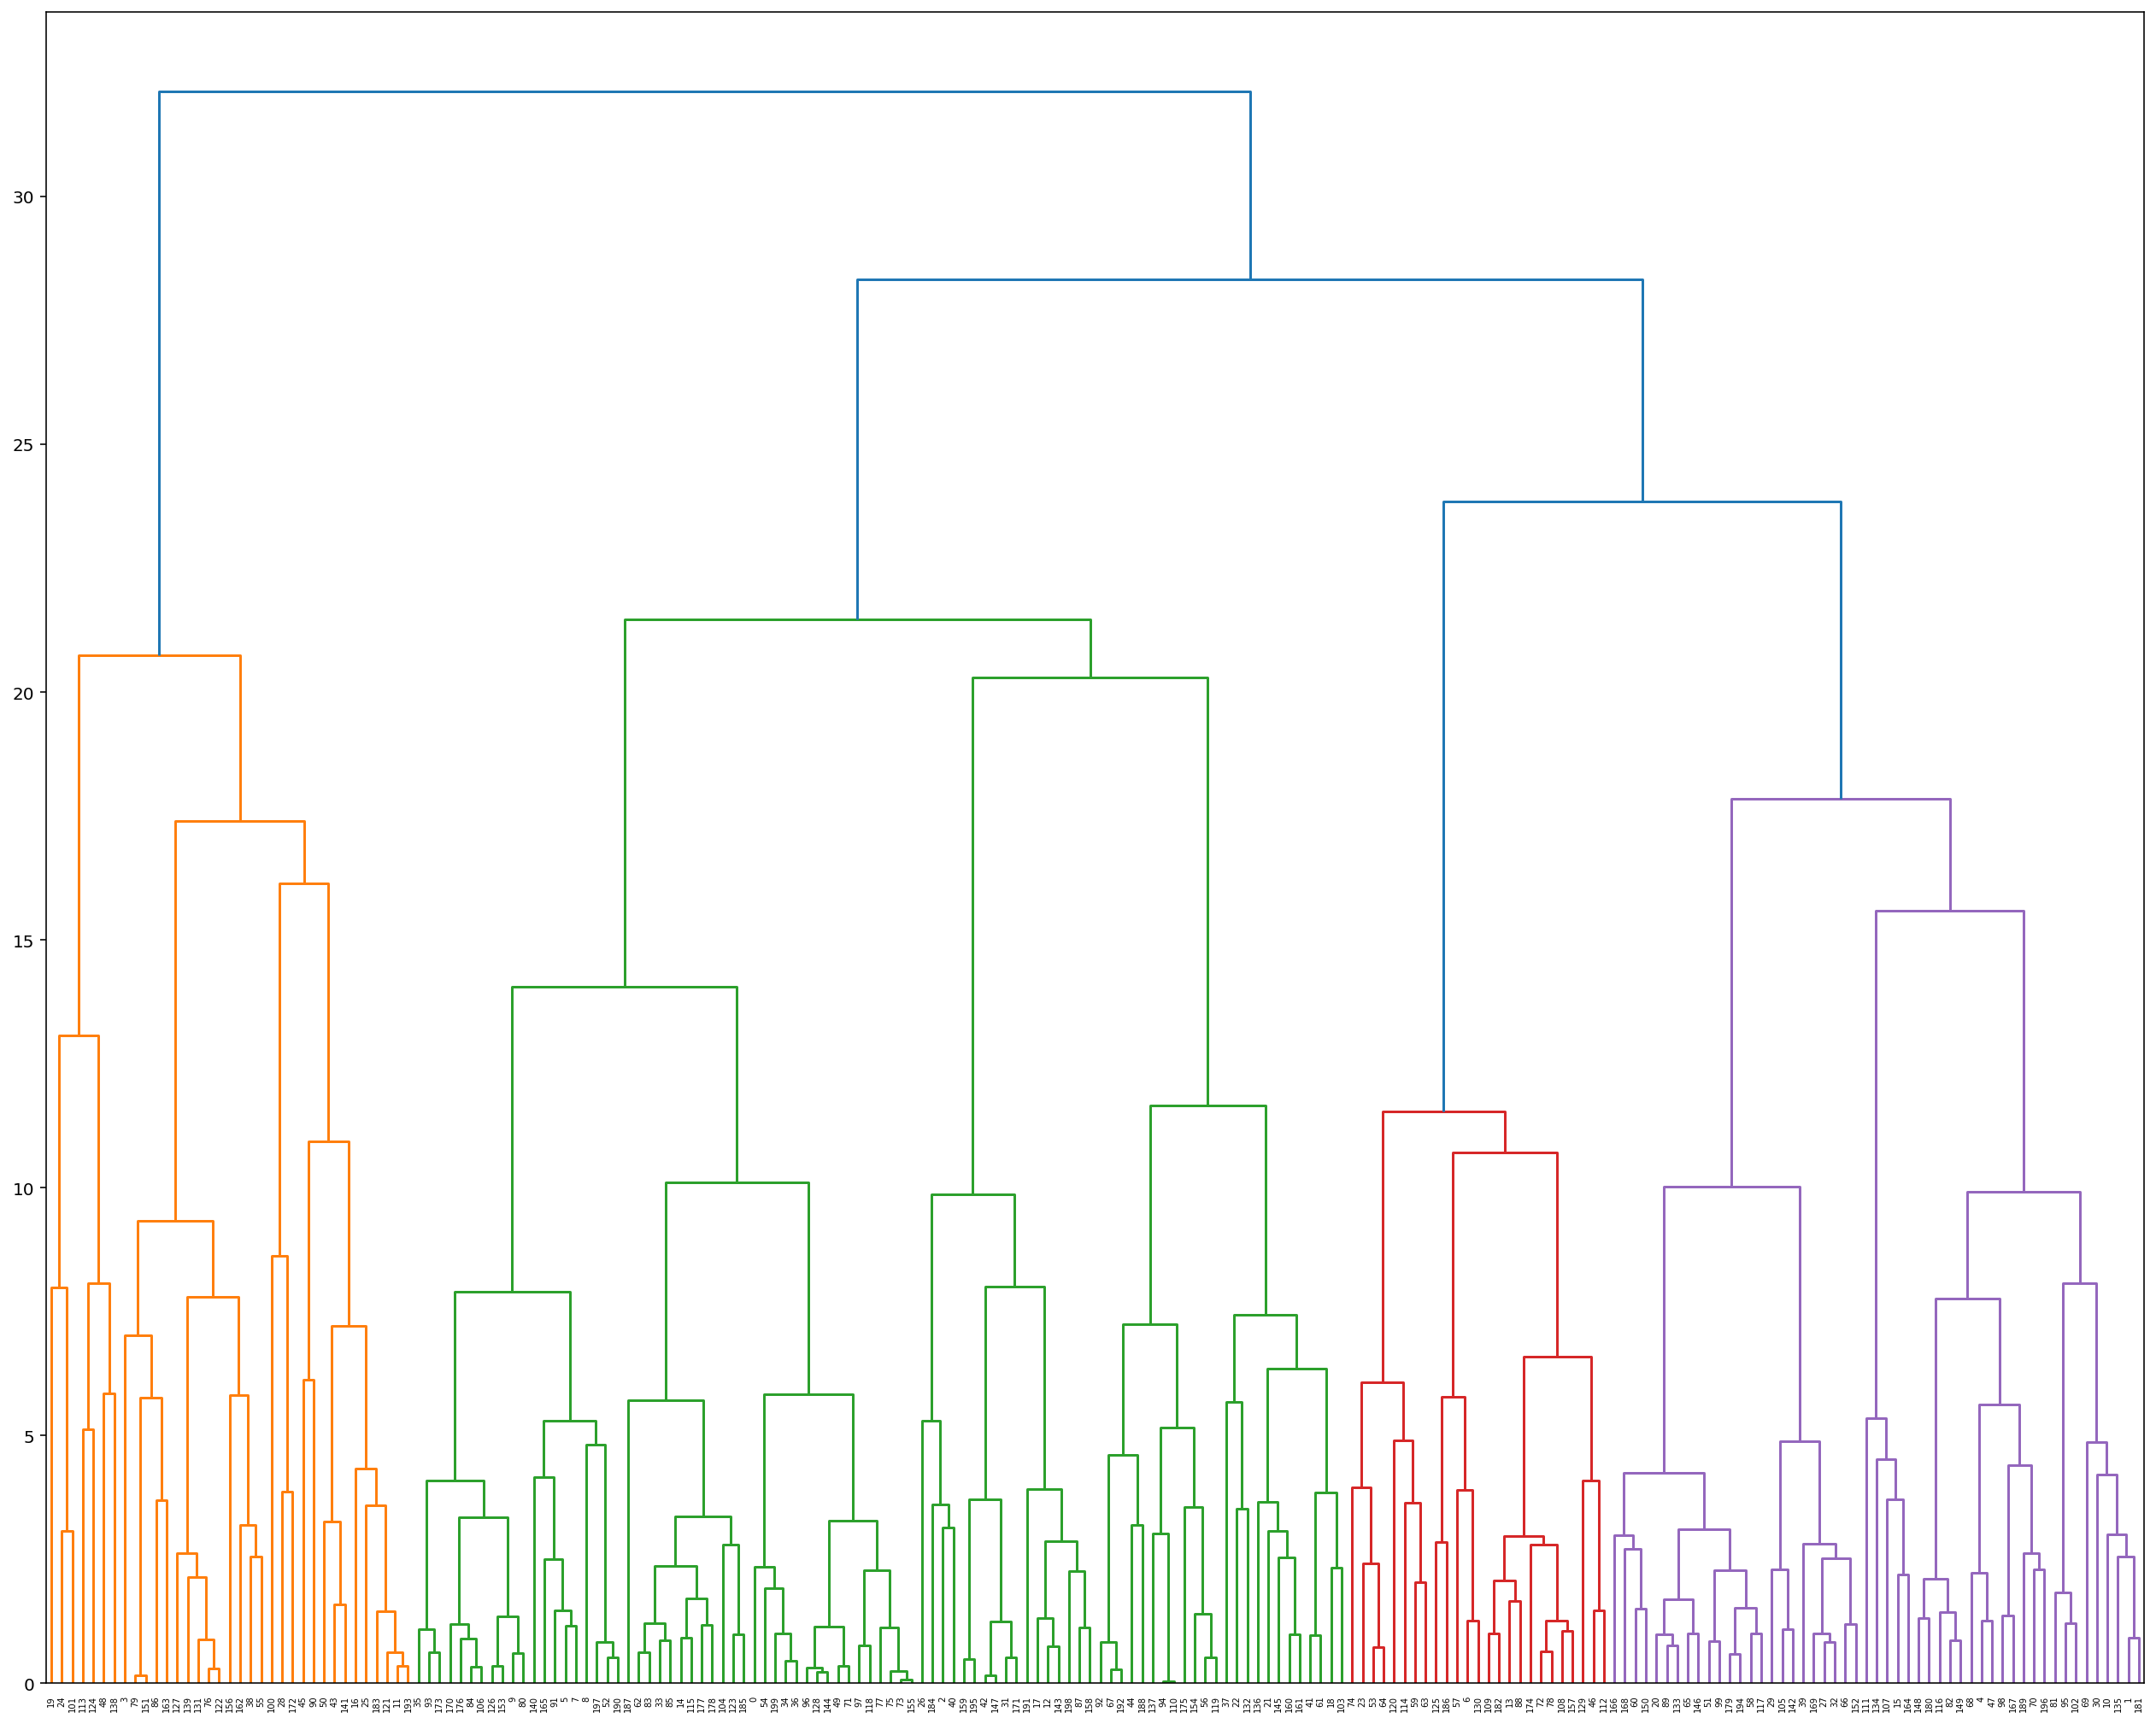

In [36]:
#using hierachical clustering to understand data
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 18))
linkage_type = 'ward'
linkage_matrix = linkage(X_train[:200, :], linkage_type)
dendrogram(linkage_matrix)
plt.show()

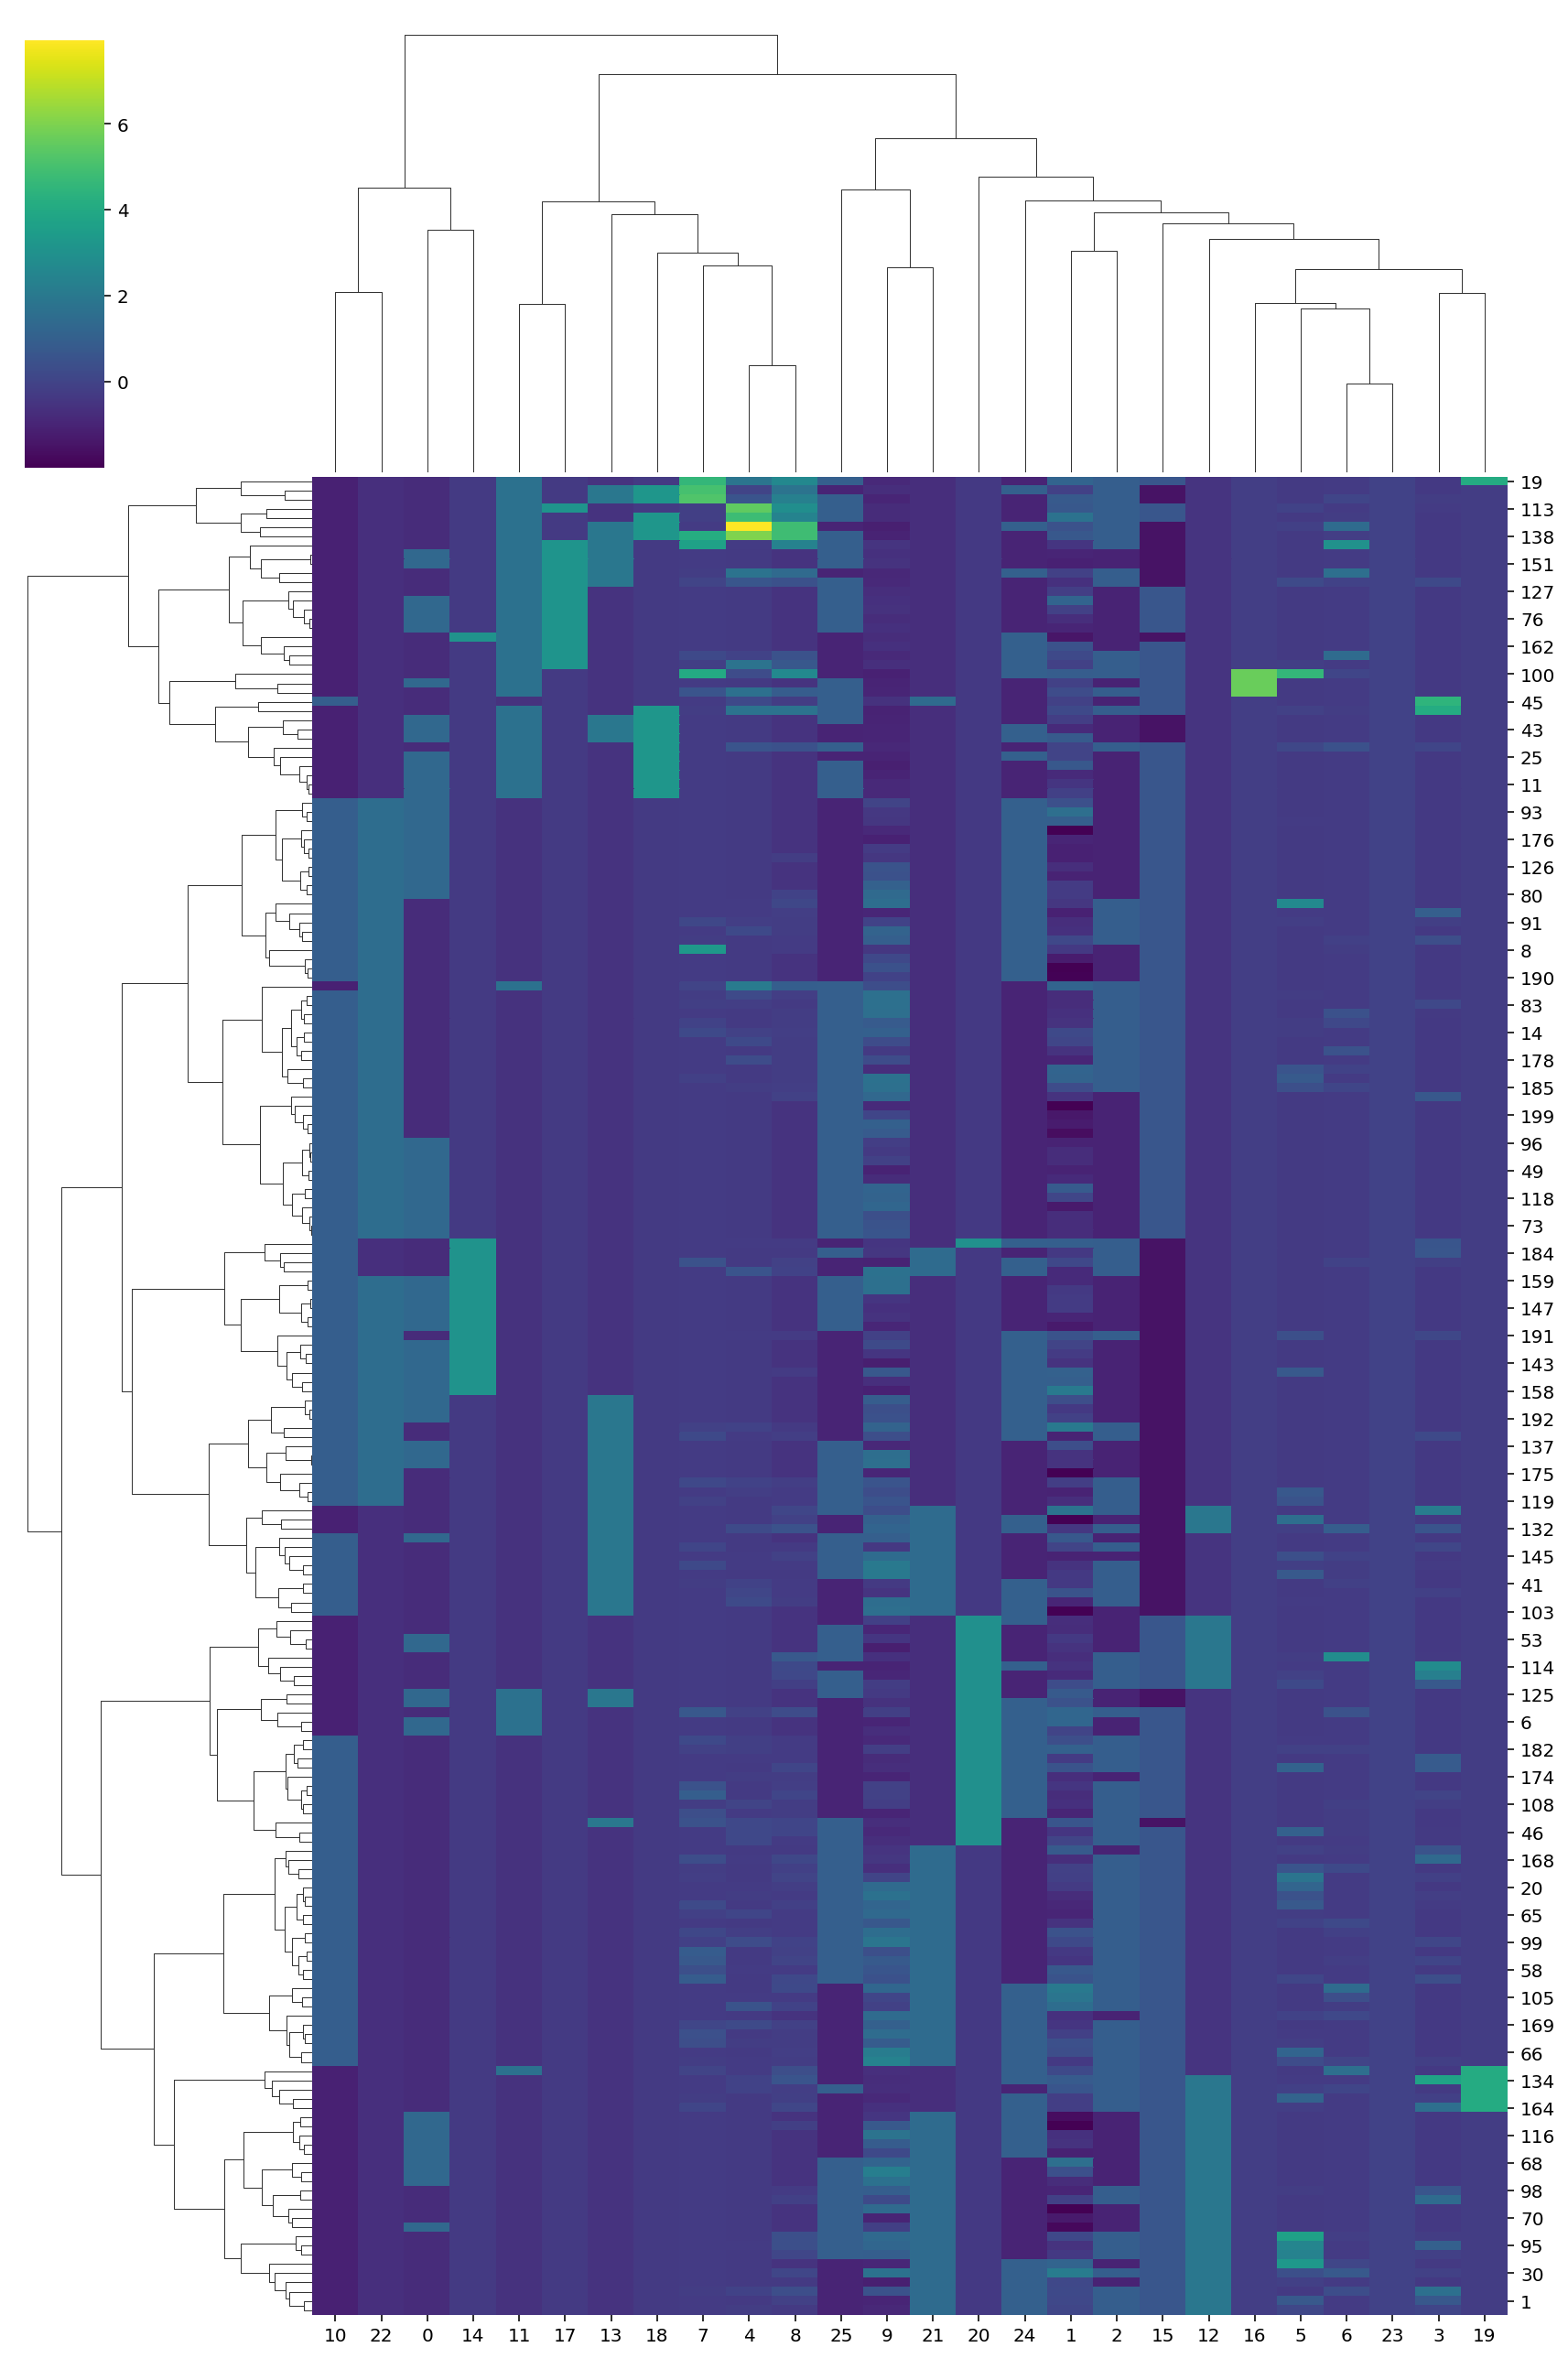

In [37]:
#using seaborn to see clearer
import seaborn as sns

sns.clustermap(X_train[:200, :], figsize=(12, 18), method=linkage_type, cmap='viridis')
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

complete = AgglomerativeClustering(n_clusters=200, linkage='complete')
complete_pred = complete.fit_predict(X_train)

average = AgglomerativeClustering(n_clusters=200, linkage='average')
average_pred = average.fit_predict(X_train)

ward = AgglomerativeClustering(n_clusters=200)
ward_pred = ward.fit_predict(X_train)

complete_score = adjusted_rand_score(X_test.astype('int'), complete_pred)
average_score = adjusted_rand_score(X_test.astype('int'), average_pred)
ward_score = adjusted_rand_score(X_test.astype('int'), ward_pred)

print('Scores: \nWard:', ward_score, '\nAverage:', average_score, '\nComplete:', complete_score)

Scores: 
Ward: 0.006035223322638235 
Average: 0.022463958201032735 
Complete: 0.012211176560179606


Text(0.5, 1.0, 'Scree Plot')

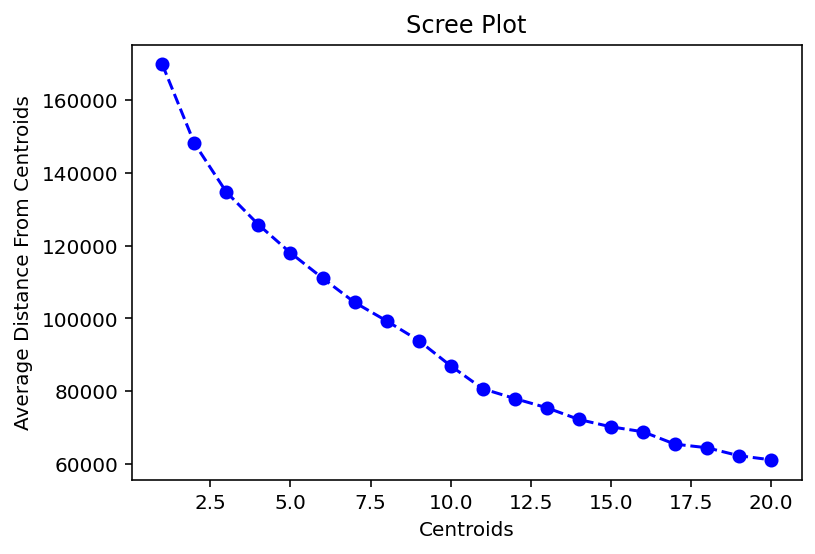

In [39]:
from sklearn.cluster import KMeans

def k_fit(k):
    scores = []
    for _ in range(1, k+1):
        kmeans_k = KMeans(_)
        kmeans_k.fit(X_train)
        scores.append(abs(kmeans_k.score(X_train)))
    return scores

k=20
scores = k_fit(k)
plt.plot(range(1,k+1), scores, '--', marker='o', color='b')
plt.xlabel('Centroids')
plt.ylabel('Average Distance From Centroids')
plt.title('Scree Plot')

In [40]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def train(models, X_train, X_test, n_estimators=None, min_samples_leaf=None):
    model_list = []
    for model in models:
        if model != AdaBoostClassifier and model != DecisionTreeClassifier:
            model = model(n_estimators=200, min_samples_leaf=3)
            model.fit(X_train, X_test)
            prediction = model.predict(y_train)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        elif model != DecisionTreeClassifier:
            rf = DecisionTreeClassifier(min_samples_leaf=3, max_depth=25)
            ada = model(base_estimator=rf, n_estimators=200)
            ada.fit(X_train, X_test)
            prediction = ada.predict(y_train)
            score = accuracy_score(prediction, y_test)
            model = ada
            print(model, score)
        else:
            tree = DecisionTreeClassifier(min_samples_leaf=3, max_depth=200)
            tree.fit(X_train, X_test)
            prediction = tree.predict(y_train)
            score = accuracy_score(prediction, y_test)
            model = tree
            print(model, score)
        model_list.append(model)
    return model_list
            
results = train([RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier],
      X_train,
      X_test)

RandomForestClassifier(min_samples_leaf=3, n_estimators=200) 0.8086476540938362
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=25,
                                                         min_samples_leaf=3),
                   n_estimators=200) 0.7925482980680773
GradientBoostingClassifier(min_samples_leaf=3, n_estimators=200) 0.8132474701011959
DecisionTreeClassifier(max_depth=200, min_samples_leaf=3) 0.7750689972401104


In [42]:
#We could try adding clustered labels into data to see if that helps improvement
ward = AgglomerativeClustering(n_clusters=2)
X_ward_pred = ward.fit_predict(X_train)
X_ward_pred = scaler.fit_transform(X_ward_pred.reshape(-1,1))
X_added = np.hstack((X_train, ward_pred.reshape(-1,1)))


y_ward_pred = ward.fit_predict(y_train)
y_ward_pred = scaler.fit_transform(y_ward_pred.reshape(-1,1))
y_added = np.hstack((y_train, y_ward_pred.reshape(-1,1)))


t_added = ward.fit_predict(test)
t_added = scaler.fit_transform(t_added.reshape(-1,1))
t_added = np.hstack((test, t_added.reshape(-1,1)))


def train2(models, X_train, X_test, n_estimators=None, min_samples_leaf=None):
    model_list = []
    for model in models:
        if model != AdaBoostClassifier and model != DecisionTreeClassifier:
            model = model(n_estimators=200, min_samples_leaf=3, min_samples_split=2)
            model.fit(X_train, X_test)
            prediction = model.predict(y_added)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        elif model != DecisionTreeClassifier:
            rf = DecisionTreeClassifier(min_samples_leaf=3, max_depth=25)
            ada = model(base_estimator=rf, n_estimators=200)
            ada.fit(X_train, X_test)
            prediction = ada.predict(y_added)
            score = accuracy_score(prediction, y_test)
            model = ada
            print(model, score)
        else:
            tree = DecisionTreeClassifier(min_samples_leaf=3, max_depth=200)
            tree.fit(X_train, X_test)
            prediction = tree.predict(y_added)
            score = accuracy_score(prediction, y_test)
            model = tree
            print(model, score)
        model_list.append(model)
    return model_list
results2 = train2([RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier],
      X_added,
      X_test)

RandomForestClassifier(min_samples_leaf=3, n_estimators=200) 0.8118675252989881
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=25,
                                                         min_samples_leaf=3),
                   n_estimators=200) 0.7631094756209752
GradientBoostingClassifier(min_samples_leaf=3, n_estimators=200) 0.8137074517019319
DecisionTreeClassifier(max_depth=200, min_samples_leaf=3) 0.7575896964121435


looks clustered labels are more effective

In [43]:
#Use grid search to find best parameters
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
parameters = {'n_estimators':[100, 150, 200],
              'min_samples_leaf': [3, 5, 7, 9]}

scorer = make_scorer(f1_score)
grid_obj = GridSearchCV(clf, scoring=scorer, param_grid=parameters)
print('done1')
grid_obj.fit(X_train, X_test.astype('int'))
print('done2')
best_clf = grid_obj.best_estimator_
best_clf.fit(X_train, X_test.astype('int'))
print('done3')
prediction = best_clf.predict(y_train)
print(accuracy_score(prediction, y_test.astype('int')), f1_score(prediction, y_test.astype('int')))

done1
done2
done3
0.8100275988960441 0.8165259884495779


In [44]:
rf_model = results[0]
np.savetxt('result.txt', rf_model.predict(test), fmt='%s')

In [45]:
np.savetxt('result2.txt', best_clf.predict(test), fmt='%s')

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

epochs = 10
model_list = []
scores = []
for e in range(epochs):
    X_train, y_train, X_test, y_test = train_test_split(X, labels, test_size = 0.25, shuffle=True)
    model = SVC(class_weight='balanced')
    model.fit(X_train, X_test)
    prediction = model.predict(y_train)
    score = accuracy_score(prediction, y_test)
    scores.append(score)
    model_list.append(model)
    print(score, sep='\n')

0.8012879484820608
0.7874885004599816
0.8026678932842686
0.8008279668813247
0.797148114075437
0.8012879484820608
0.7994480220791168
0.8031278748850046
0.7989880404783809
0.8031278748850046


In [47]:
np.savetxt('result3.txt', model.predict(test), fmt='%s')

In [48]:
#Curious about how Xgboost performs
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=800, min_samples_leaf=2, max_depth=50, n_jobs=20)
model.fit(X_train, X_test)
prediction = model.predict(y_train)
score = accuracy_score(prediction, y_test)
print(model, score, sep='\n')

[20:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.30

In [49]:
np.savetxt('result4.txt', model.predict(test), fmt='%s')

In [50]:
# defining a voting function to optimize the prediction results
import collections
def optimize(models, test, t_added=None):
    """
    INPUT: model lists, test data, test data with clusterd labels
    OUTPUT: predicted values with most votes
    """
    table = np.zeros((len(models), len(test)))
    for i, m in enumerate(models):
        try:
            p = m.predict(test)
        except:
            p = m.predict(t_added)
        finally:
            table[i] = p
    vote0, vote1 = (table==0).sum(axis=0), (table==1).sum(axis=0)
    votes = np.vstack((vote0, vote1))
    predictions = np.argmax(votes, axis=0)
    return predictions

In [51]:
model_list = [results[0]] + [results[2]] + [results2[0]] + [results2[2]] + [best_clf] + [model] + model_list
predictions = optimize(model_list, test, t_added)
np.savetxt('emsemble.txt', predictions, fmt='%s')

In [52]:
predictions

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)